C:\Users\HP\AppData\Local\Temp\ipykernel_4604\972611152.py:57: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['age'], shade=True)


<Axes: xlabel='class', ylabel='survived'>

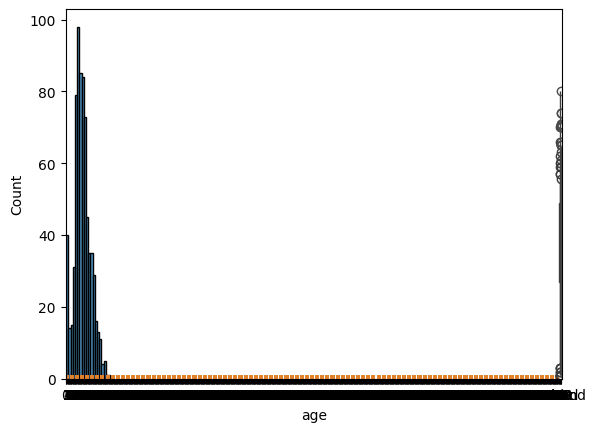

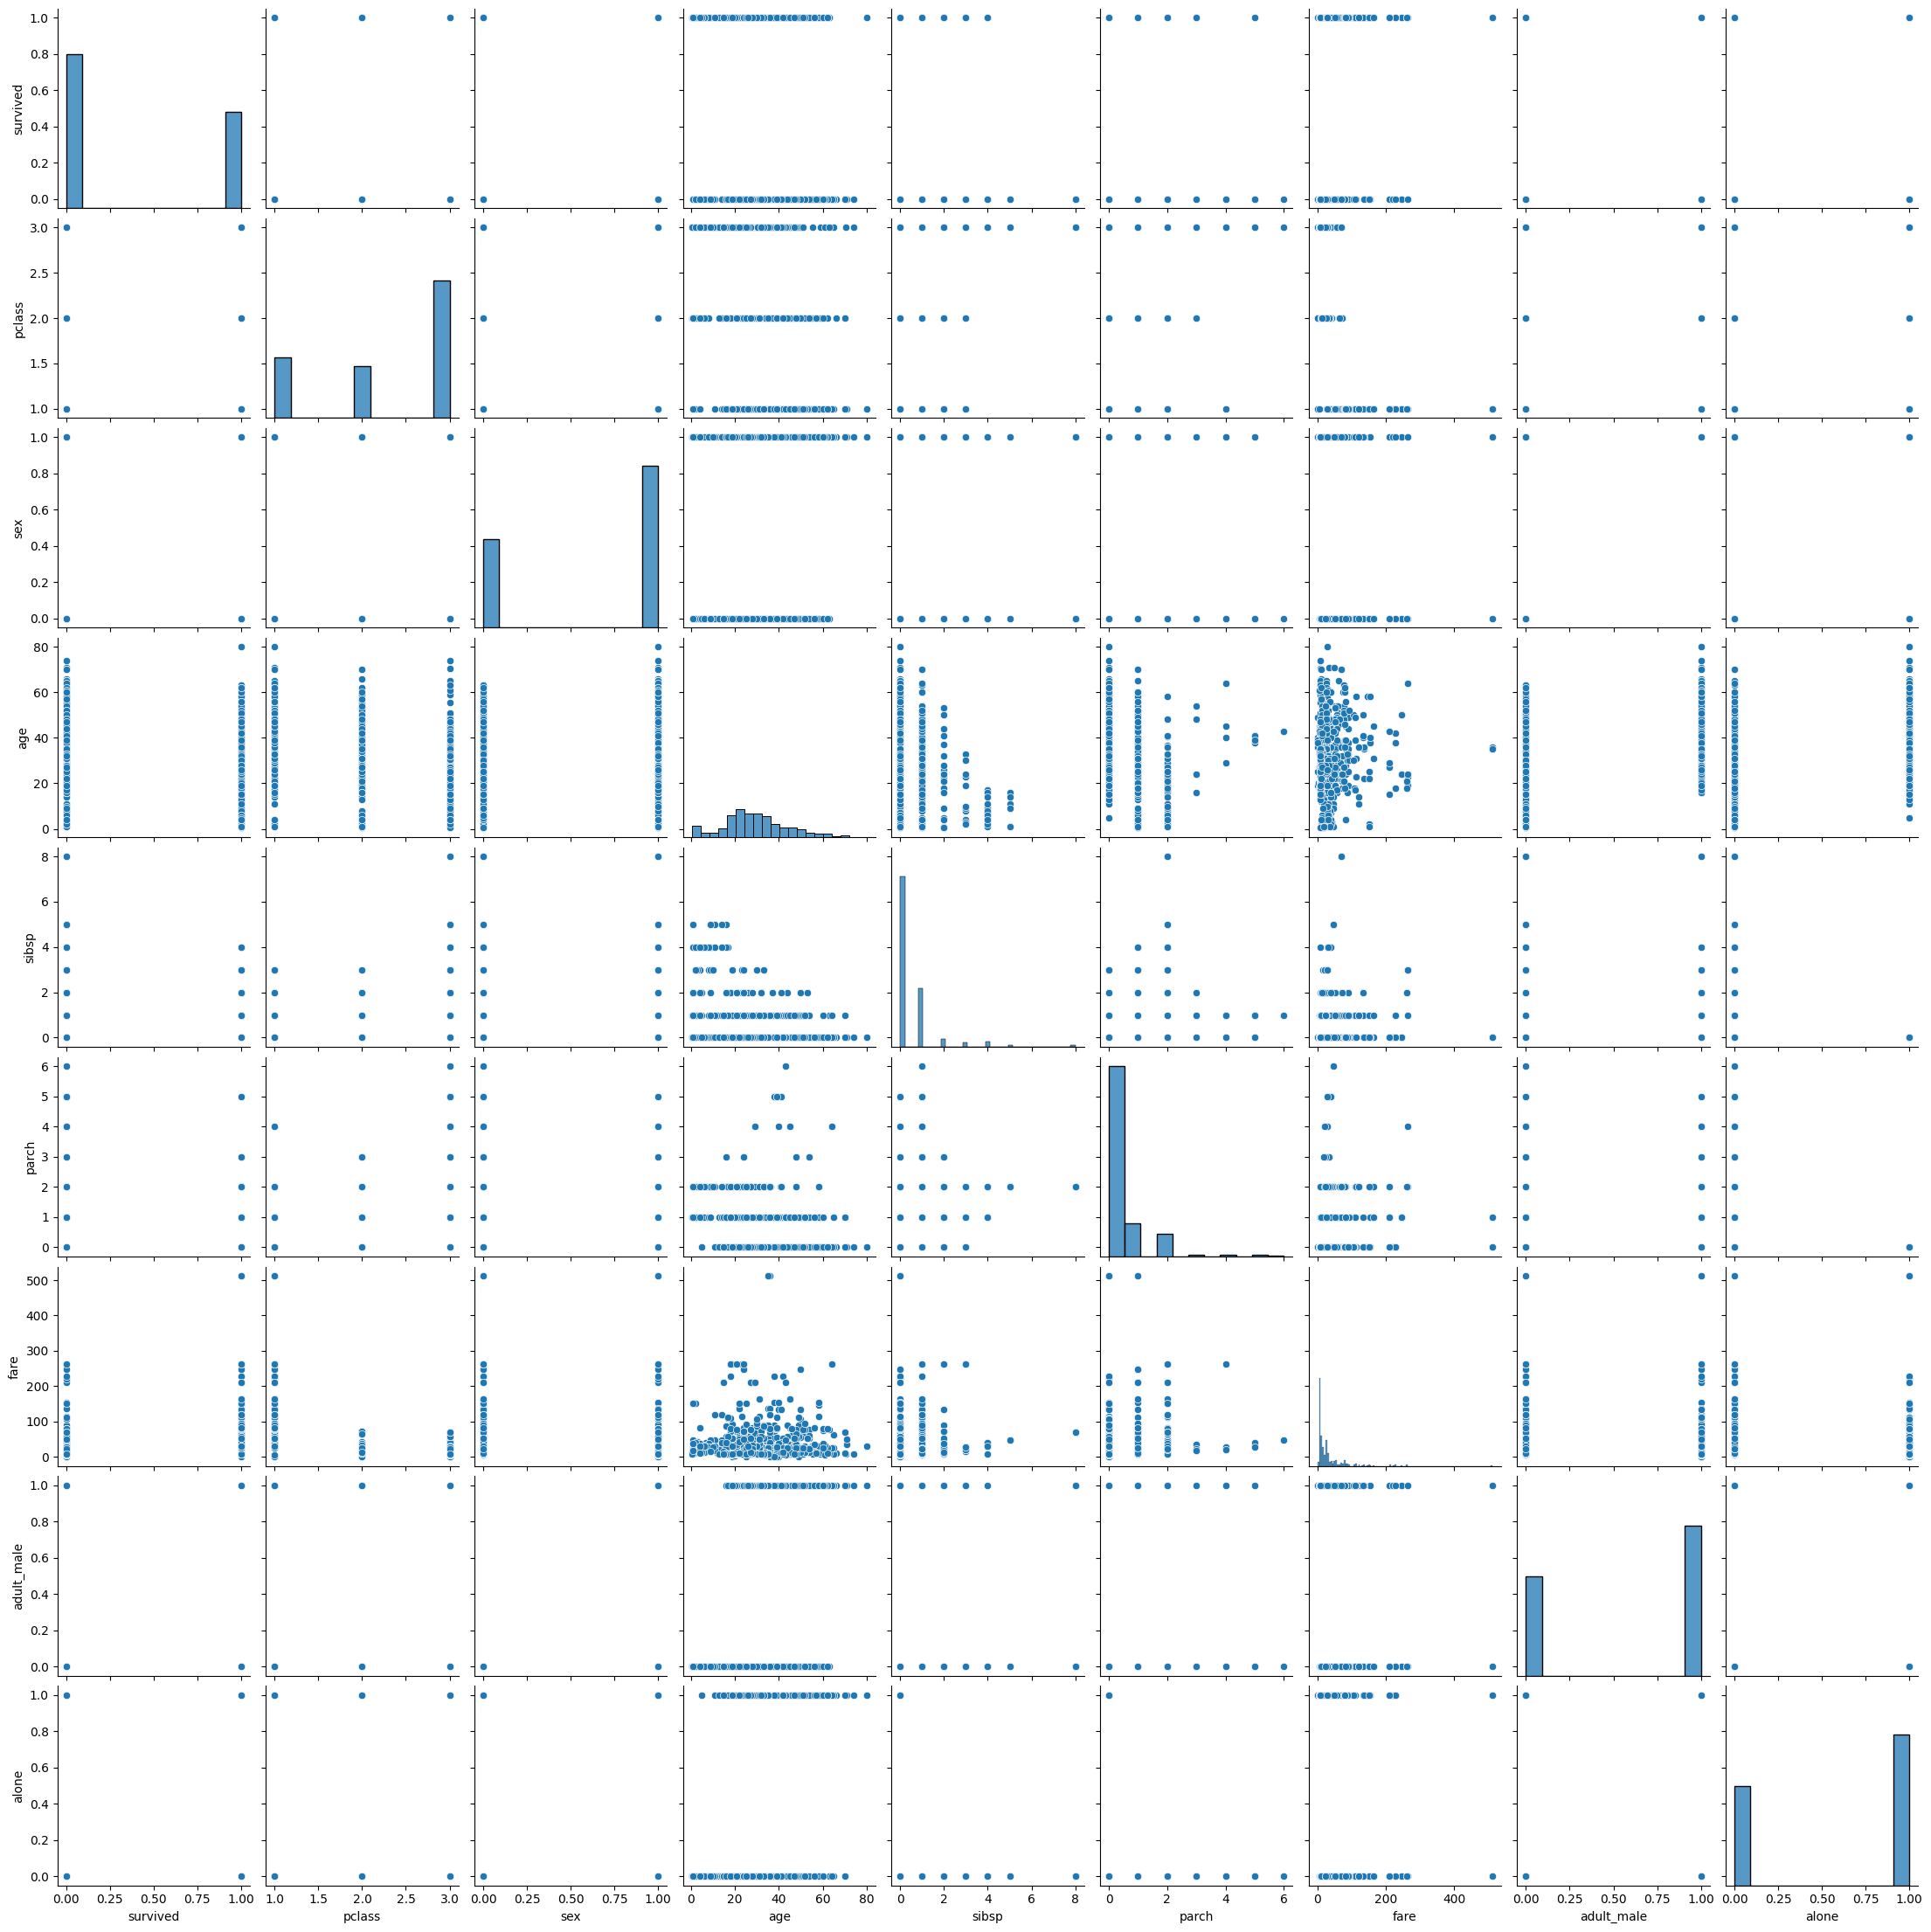

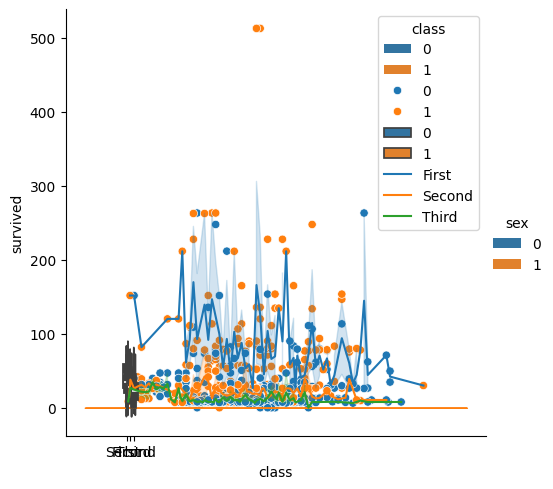

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = sns.load_dataset("titanic")

# Check the first few rows of the dataset
df.head()

# Check the shape of the dataset
df.shape

# Check the data types of the columns
df.dtypes

# Check for missing values
df.isnull().sum()

# Check the summary statistics of the numerical columns
df.describe()

# Check the distribution of the numerical columns
sns.histplot(df['age'], kde=False)

# Check the correlation between the numerical columns
# Convert the sex column to a numeric format (1 for male and 0 for female)
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Check the count of categorical variables
sns.countplot(df['sex'])

# Check the relationship between categorical and numerical variables
sns.boxplot(x='class', y='age', data=df)

# Check for outliers in the numerical columns
sns.boxplot(df['age'])

# Check for any patterns or trends in the data
sns.pairplot(df)

# Check for any anomalies or inconsistencies in the data
sns.catplot(x='class', y='survived', hue='sex', kind='bar', data=df)

# Check for any relationships between variables
sns.scatterplot(x='age', y='fare', hue='survived', data=df)

# Check for any differences between groups
sns.violinplot(x='class', y='age', hue='survived', data=df)

# Check for any changes over time
sns.lineplot(x='age', y='fare', hue='class', data=df)

# Check for any differences between distributions
sns.kdeplot(df['age'], shade=True)

In [3]:
# Calculate the IQR of the 'age' column
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Find the lower and upper bounds for the 'age' column
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Calculate the IQR of the 'fare' column
Q1_fare = df['fare'].quantile(0.25)
Q3_fare = df['fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Find the lower and upper bounds for the 'fare' column
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

# Identify outliers in the 'age' and 'fare' columns
outliers_age = (df['age'] < lower_bound_age) | (df['age'] > upper_bound_age)
outliers_fare = (df['fare'] < lower_bound_fare) | (df['fare'] > upper_bound_fare)

# Print the outliers in the 'age' and 'fare' columns
print("Outliers in the 'age' column:")
print(df[outliers_age])

print("Outliers in the 'fare' column:")
print(df[outliers_fare])

Outliers in the 'age' column:
     survived  pclass  sex   age  sibsp  parch     fare embarked   class  who  \
33          0       2    1  66.0      0      0  10.5000        S  Second  man   
54          0       1    1  65.0      0      1  61.9792        C   First  man   
96          0       1    1  71.0      0      0  34.6542        C   First  man   
116         0       3    1  70.5      0      0   7.7500        Q   Third  man   
280         0       3    1  65.0      0      0   7.7500        Q   Third  man   
456         0       1    1  65.0      0      0  26.5500        S   First  man   
493         0       1    1  71.0      0      0  49.5042        C   First  man   
630         1       1    1  80.0      0      0  30.0000        S   First  man   
672         0       2    1  70.0      0      0  10.5000        S  Second  man   
745         0       1    1  70.0      1      1  71.0000        S   First  man   
851         0       3    1  74.0      0      0   7.7750        S   Third  man  

In [5]:


# Identify and remove outliers
outliers_age = df[(df['age'] < lower_bound_age) | (df['age'] > upper_bound_age)]
outliers_fare = df[(df['fare'] < lower_bound_fare) | (df['fare'] > upper_bound_fare)]

# Remove outliers from the DataFrame
df_clean = df[~((df['age'] < lower_bound_age) | (df['age'] > upper_bound_age) | (df['fare'] < lower_bound_fare) | (df['fare'] > upper_bound_fare))]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(5), object(4)
memory usage: 80.7+ KB


In [9]:
# Fill NaN values in specific columns with mean and median
values = {'age': df['age'].mean(), 'fare': df['fare'].median()}
df.fillna(value=values, inplace=True)

In [12]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,23.799293,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,17.596074,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/fe/6b/db949ed5ac367987b1f250f070f340b7715d22f0c9c965bdf07de6ca75a3/scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   -----------------

In [13]:
!conda install scikit-learn

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
import sklearn

In [17]:
# Convert the 'embarked' column into multiple binary columns
df_embarked = pd.get_dummies(df['embarked'], prefix='embarked')

# Concatenate the binary columns with the original DataFrame
df = pd.concat([df, df_embarked], axis=1)

# Drop the original 'embarked' column
df.drop('embarked', axis=1, inplace=True)

In [19]:
# Assuming df is the DataFrame
df.drop_duplicates(inplace=True)